###  Loading required Libraries

In [36]:
import pandas as pd
import numpy as np
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
%matplotlib inline 

###  Importing dataset

In [37]:
movies = pd.read_csv("C:/Users/SONY/Downloads/movies_metadata.csv")

In [38]:
ratings = pd.read_csv("C:/Users/SONY/Desktop/projectfinal/New folder/ratings.csv")

In [39]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,movieid,imdb_id,original_language,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,english,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,30-10-1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,english,When siblings Judy and Peter discover an encha...,17.015539,...,15-12-1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,english,A family wedding reignites the ancient feud be...,11.712900,...,22-12-1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,english,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,22-12-1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,english,Just when George Banks has recovered from his ...,8.387519,...,10-02-1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [40]:
ratings.head()

,userId,movieid,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


###  Data preprocessing

In [41]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'movieid', 'imdb_id', 'original_language', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'video', 'vote_average', 'vote_count'],
      dtype='object')

In [42]:
 movies = movies.drop(["belongs_to_collection","homepage","poster_path","tagline"],axis = 1)


In [43]:
movies.shape

(45463, 19)

In [44]:
ratings.shape

(1048575, 4)

In [45]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45463 non-null  bool   
 1   budget                45463 non-null  int64  
 2   genres                45463 non-null  object 
 3   movieid               45463 non-null  int64  
 4   imdb_id               45446 non-null  object 
 5   original_language     45452 non-null  object 
 6   overview              44509 non-null  object 
 7   popularity            45460 non-null  float64
 8   production_companies  45460 non-null  object 
 9   production_countries  45460 non-null  object 
 10  release_date          45376 non-null  object 
 11  revenue               45460 non-null  float64
 12  runtime               45203 non-null  float64
 13  spoken_languages      45460 non-null  object 
 14  status                45379 non-null  object 
 15  title              

In [46]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1048575 non-null  int64  
 1   movieid    1048575 non-null  int64  
 2   rating     1048575 non-null  float64
 3   timestamp  1048575 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 32.0 MB


###  Descriptive analysis

In [47]:
movies.describe().round(0)

,budget,movieid,popularity,revenue,runtime,vote_average,vote_count
count,45463.0,45463.0,45460.0,4.546000e+04,45203.0,45460.0,45460.0
mean,4224579.0,108360.0,3.0,1.120935e+07,94.0,6.0,110.0
std,17424133.0,112461.0,6.0,6.433225e+07,38.0,2.0,491.0
min,0.0,2.0,0.0,0.000000e+00,0.0,0.0,0.0
25%,0.0,26450.0,0.0,0.000000e+00,85.0,5.0,3.0
50%,0.0,60003.0,1.0,0.000000e+00,95.0,6.0,10.0
75%,0.0,157328.0,4.0,0.000000e+00,107.0,7.0,34.0
max,380000000.0,469172.0,547.0,2.787965e+09,1256.0,10.0,14075.0


In [48]:
ratings.describe().round(0)

,userId,movieid,rating,timestamp
count,1048575.0,1048575.0,1048575.0,1.048575e+06
mean,5379.0,16159.0,4.0,1.173062e+09
std,3065.0,31267.0,1.0,2.045386e+08
min,1.0,1.0,0.0,8.255829e+08
25%,2728.0,1080.0,3.0,9.922286e+08
50%,5383.0,2642.0,4.0,1.159314e+09
75%,8060.0,6643.0,4.0,1.354659e+09
max,10656.0,176271.0,5.0,1.501822e+09


In [49]:
movies["original_language"] = movies["original_language"].astype("category")
movies["spoken_languages"] = movies["spoken_languages"].astype("category")
movies["status"] = movies["status"].astype("category")
movies['popularity'] = movies['popularity'].astype('float')
movies['budget'] = pd.to_numeric(movies['budget']) 
movies['popularity'] = movies['popularity'].astype('float')

In [50]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   adult                 45463 non-null  bool    
 1   budget                45463 non-null  int64   
 2   genres                45463 non-null  object  
 3   movieid               45463 non-null  int64   
 4   imdb_id               45446 non-null  object  
 5   original_language     45452 non-null  category
 6   overview              44509 non-null  object  
 7   popularity            45460 non-null  float64 
 8   production_companies  45460 non-null  object  
 9   production_countries  45460 non-null  object  
 10  release_date          45376 non-null  object  
 11  revenue               45460 non-null  float64 
 12  runtime               45203 non-null  float64 
 13  spoken_languages      45460 non-null  category
 14  status                45379 non-null  category
 15  ti

In [51]:
print(movies.isnull().sum())

adult                     0
budget                    0
genres                    0
movieid                   0
imdb_id                  17
original_language        11
overview                954
popularity                3
production_companies      3
production_countries      3
release_date             87
revenue                   3
runtime                 260
spoken_languages          3
status                   84
title                     3
video                     3
vote_average              3
vote_count                3
dtype: int64


In [52]:
movies = movies.dropna()

In [53]:
print(movies.isnull().sum())

adult                   0
budget                  0
genres                  0
movieid                 0
imdb_id                 0
original_language       0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64


In [54]:
print(ratings.isnull().sum())

userId       0
movieid      0
rating       0
timestamp    0
dtype: int64


In [55]:
movies.duplicated().sum()

17

In [56]:
movies.drop_duplicates(inplace = True)

In [57]:
movies.duplicated().sum()

0

In [58]:
ratings.duplicated().sum()

0

<AxesSubplot:xlabel='rating'>

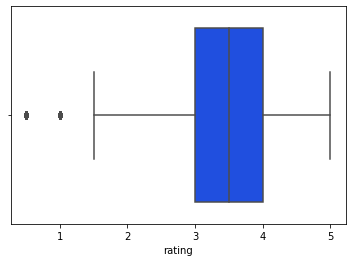

In [59]:
sb.boxplot(x=ratings['rating'])

In [60]:
# To recommend a good movie there needs to be a metric or rating, so a score is needed for each movie, 
#take the scores and use that data to recommend the best movies.
#So minimum rating average is approximately 6

In [61]:
C = movies['vote_average'].mean()
C

5.646896147252264

In [62]:
#Find the minimum amount of votes to be listed.
#Find the movies that have at least 90% more votes than the others.

In [63]:
m = movies['vote_count'].quantile(0.9)
m

166.0

In [64]:
#Using these last 2 values 
#I can now add them to the weighted rating formula to get a list of movies that will be recommended.
lists_movies =movies.copy().loc[movies['vote_count'] >= m]

lists_movies.shape

(4435, 19)

In [65]:
#Now I have new list of highest rated movies (4555)

In [66]:
movies.corr()

,adult,budget,movieid,popularity,revenue,runtime,vote_average,vote_count
adult,1.000000,-0.003226,0.002971,-0.003008,-0.002371,-0.006027,-0.012097,-0.002809
budget,-0.003226,1.000000,-0.100187,0.448666,0.768630,0.133483,0.072358,0.676324
movieid,0.002971,-0.100187,1.000000,-0.079145,-0.070085,-0.114512,-0.159606,-0.063036
popularity,-0.003008,0.448666,-0.079145,1.000000,0.505810,0.124985,0.152297,0.559357
revenue,-0.002371,0.768630,-0.070085,0.505810,1.000000,0.103154,0.084065,0.811886
runtime,-0.006027,0.133483,-0.114512,0.124985,0.103154,1.000000,0.155384,0.112379
vote_average,-0.012097,0.072358,-0.159606,0.152297,0.084065,0.155384,1.000000,0.124333
vote_count,-0.002809,0.676324,-0.063036,0.559357,0.811886,0.112379,0.124333,1.000000


In [67]:
movies['original_language'].value_counts()

english     32052
french       2277
japenese     1345
italian      1264
german        961
            ...  
fy              1
eo              1
cy              1
ay              1
zu              1
Name: original_language, Length: 89, dtype: int64

In [68]:
movies['status'].value_counts()

Released           43994
Rumored              213
Post Production       96
In Production         16
Planned               12
Canceled               1
Name: status, dtype: int64

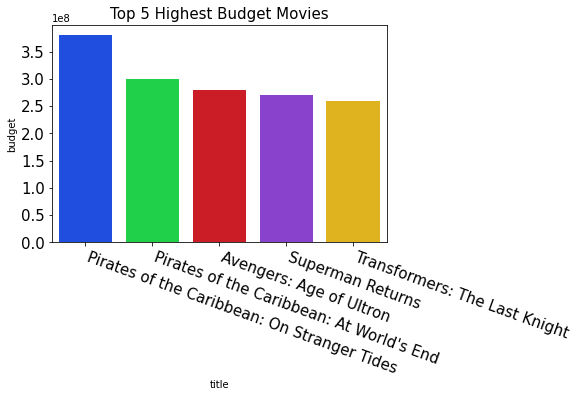

In [69]:
cols = ['title', 'budget']
budget_movies = movies.sort_values('budget', ascending=False)[cols].set_index('title')
top_5 = budget_movies.head(5)
sb.barplot(data=top_5, x=top_5.index, y='budget');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.title('Top 5 Highest Budget Movies', fontsize=15);

In [70]:
movies.dtypes

adult                       bool
budget                     int64
genres                    object
movieid                    int64
imdb_id                   object
original_language       category
overview                  object
popularity               float64
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages        category
status                  category
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

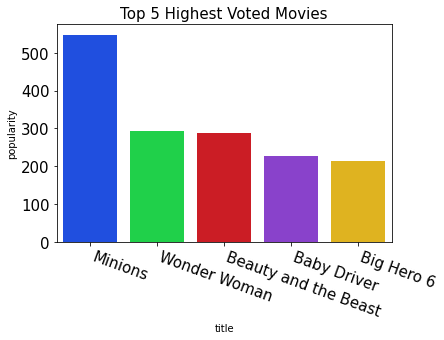

In [71]:
cols = ['title', 'popularity']
popularity_movies = movies.sort_values('popularity', ascending=False)[cols].set_index('title')
top_5 = popularity_movies.head(5)
sb.barplot(data=top_5, x=top_5.index, y='popularity');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.title('Top 5 Highest Voted Movies', fontsize=15);

In [72]:
movie_data=pd.merge(ratings,movies,on='movieid')
movie_data.head()

,userId,movieid,rating,timestamp,adult,budget,genres,imdb_id,original_language,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,1,110,1.0,1425941529,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",27-05-1994,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0
1,11,110,3.5,1231676989,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",27-05-1994,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0
2,22,110,5.0,1111937009,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",27-05-1994,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0
3,24,110,5.0,979870012,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",27-05-1994,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0
4,29,110,3.0,1044020005,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",27-05-1994,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0


In [73]:
trend=pd.DataFrame(movie_data.groupby('title')['rating'].mean())
trend['total number of ratings'] = pd.DataFrame(movie_data.groupby('title')['rating'].count()) 
trend.head()

,rating,total number of ratings
title,,
!Women Art Revolution,3.014706,34
$5 a Day,2.000000,8
'Gator Bait,3.583333,6
'R Xmas,3.666667,6
'Twas the Night Before Christmas,3.718750,16


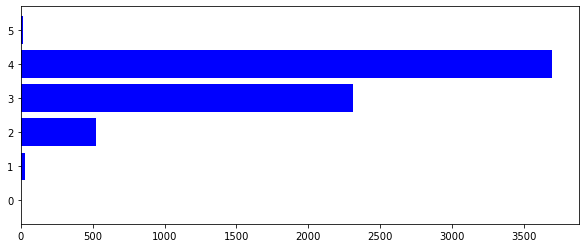

In [74]:
plt.figure(figsize =(10, 4))
ax=plt.barh(trend['rating'].round(),trend['total number of ratings'],color='b')
plt.show()

In [75]:
movies1 = movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()
movies1.head()

title
Frida              5.0
8MM                5.0
Last Train Home    5.0
Piggy              5.0
Chimpanzee         5.0
Name: rating, dtype: float64

In [76]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [77]:
normalized = preprocessing.normalize(ratings)

In [78]:
scaler =MinMaxScaler()

In [79]:
scaled_df = pd.DataFrame(scaler.fit_transform(ratings),columns = ratings.columns)
scaled_df

,userId,movieid,rating,timestamp
0,0.0,0.000618,0.111111,0.887790
1,0.0,0.000828,0.888889,0.887791
2,0.0,0.004862,1.000000,0.887790
3,0.0,0.006921,1.000000,0.887790
4,0.0,0.007063,1.000000,0.887790
...,...,...,...,...
1048570,1.0,0.009117,0.333333,0.120035
1048571,1.0,0.009128,0.555556,0.120035
1048572,1.0,0.009151,0.555556,0.120033
1048573,1.0,0.009162,0.111111,0.120035


In [80]:
print(scaled_df)

         userId   movieid    rating  timestamp
0           0.0  0.000618  0.111111   0.887790
1           0.0  0.000828  0.888889   0.887791
2           0.0  0.004862  1.000000   0.887790
3           0.0  0.006921  1.000000   0.887790
4           0.0  0.007063  1.000000   0.887790
...         ...       ...       ...        ...
1048570     1.0  0.009117  0.333333   0.120035
1048571     1.0  0.009128  0.555556   0.120035
1048572     1.0  0.009151  0.555556   0.120033
1048573     1.0  0.009162  0.111111   0.120035
1048574     1.0  0.009168  0.777778   0.120150

[1048575 rows x 4 columns]


In [81]:
## Encoding users and movie titles to make sure that the sequence has no missing values

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [83]:
user_enc = LabelEncoder()
movie_data['userId'] = user_enc.fit_transform(movie_data['userId'].values)
n_users = movie_data['userId'].nunique()

In [84]:
item_enc = LabelEncoder()
movie_data['movie'] = item_enc.fit_transform(movie_data['title'].values)
n_movies = movie_data['movie'].nunique()

In [85]:
movie_data['rating'] = movie_data['rating'].values.astype(np.float32)
min_rating = min(movie_data['rating'])
max_rating = max(movie_data['rating'])
n_users, n_movies, min_rating, max_rating

(10464, 4923, 0.5, 5.0)

In [51]:
movie_data.head()

,userId,movieid,rating,timestamp,adult,budget,genres,imdb_id,original_language,overview,...,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count,movie
0,0,110,1.0,1425941529,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,27-05-1994,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0,4492
1,10,110,3.5,1231676989,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,27-05-1994,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0,4492
2,21,110,5.0,1111937009,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,27-05-1994,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0,4492
3,23,110,5.0,979870012,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,27-05-1994,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0,4492
4,28,110,3.0,1044020005,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,27-05-1994,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0,4492


# Splitting the data into training and testing

In [52]:
X = movie_data[['userId', 'movie']].values
y = movie_data['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((410915, 2), (45658, 2), (410915,), (45658,))

In [53]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [54]:
X_train, X_train_array, X_train_array[0].shape

(array([[ 1264,  2452],
        [ 9917,  3604],
        [  627,    54],
        ...,
        [ 8566,  1993],
        [ 3712,  1617],
        [10301,  3842]], dtype=int64),
 [array([ 1264,  9917,   627, ...,  8566,  3712, 10301], dtype=int64),
  array([2452, 3604,   54, ..., 1993, 1617, 3842], dtype=int64)],
 (410915,))

In [55]:
rating_count_df = pd.DataFrame(movie_data.groupby(['rating']).size(), columns=['count'])
rating_count_df

,count
rating,
0.5,5415
1.0,15453
1.5,5685
2.0,31980
2.5,19280
3.0,103157
3.5,47491
4.0,124523
4.5,32555


In [56]:
#importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 1)
plt.rcParams["axes.grid"] = False
#plt.style.use('dark_background')
%matplotlib inline

In [57]:
movies_average_rating=movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).reset_index().rename(columns={'rating':'Average Rating'})
movies_average_rating.head()

,title,Average Rating
0,Frida,5.0
1,8MM,5.0
2,Last Train Home,5.0
3,Piggy,5.0
4,Chimpanzee,5.0


In [58]:
movies_rating_count=movie_data.groupby('title')['rating'].count().sort_values(ascending=True).reset_index().rename(columns={'rating':'Rating Count'}) #ascending=False
movies_rating_count_avg=movies_rating_count.merge(movies_average_rating, on='title')
movies_rating_count_avg.head()

,title,Rating Count,Average Rating
0,Mr. Peabody & Sherman,1,4.0
1,No One Killed Jessica,1,3.5
2,Magic,1,3.5
3,Magic Magic,1,3.0
4,Case départ,1,4.0


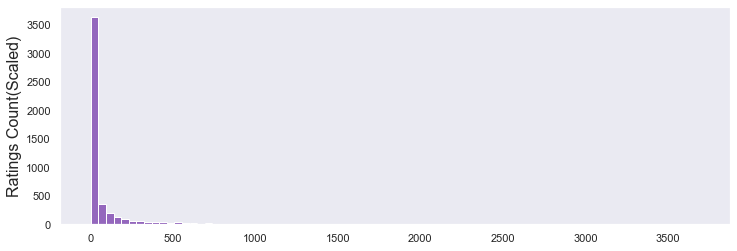

In [59]:
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Rating Count'],bins=80,color='tab:purple')
plt.ylabel('Ratings Count(Scaled)', fontsize=16)
plt.savefig('ratingcounthist.jpg')

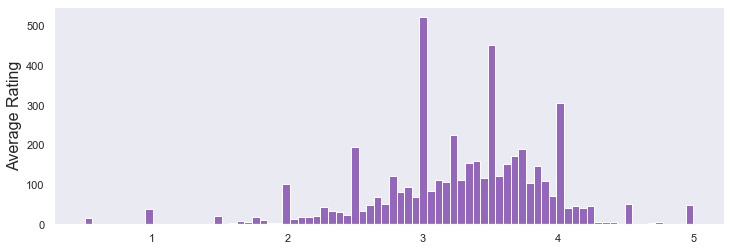

In [60]:
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Average Rating'],bins=80,color='tab:purple')
plt.ylabel('Average Rating',fontsize=16)
plt.savefig('avgratinghist.jpg')

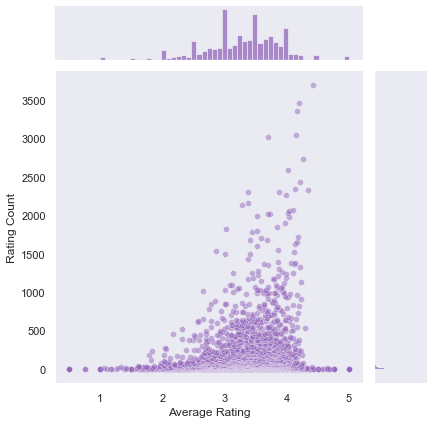

In [61]:

plot=sns.jointplot(x='Average Rating',y='Rating Count',data=movies_rating_count_avg,alpha=0.5, color='tab:purple')
plot.savefig('joinplot.jpg')

Eliminating Outliers

In [62]:
rating_with_RatingCount = movie_data.merge(movies_rating_count, left_on = 'title', right_on = 'title', how = 'left')
rating_with_RatingCount.head()

,userId,movieid,rating,timestamp,adult,budget,genres,imdb_id,original_language,overview,...,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count,movie,Rating Count
0,0,110,1.0,1425941529,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0,4492,2594
1,10,110,3.5,1231676989,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0,4492,2594
2,21,110,5.0,1111937009,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0,4492,2594
3,23,110,5.0,979870012,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0,4492,2594
4,28,110,3.0,1044020005,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0,4492,2594


In [63]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(rating_with_RatingCount['Rating Count'].describe())

count   456573.000
mean       819.375
std        807.667
min          1.000
25%        221.000
50%        548.000
75%       1115.000
max       3692.000
Name: Rating Count, dtype: float64


In [64]:
popularity_threshold = 50
popular_movies= rating_with_RatingCount[rating_with_RatingCount['Rating Count']>=popularity_threshold]
popular_movies.head()
#popular_movies.shape

,userId,movieid,rating,timestamp,adult,budget,genres,imdb_id,original_language,overview,...,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count,movie,Rating Count
0,0,110,1.000,1425941529,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,0.000,99.000,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.800,246.000,4492,2594
1,10,110,3.500,1231676989,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,0.000,99.000,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.800,246.000,4492,2594
2,21,110,5.000,1111937009,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,0.000,99.000,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.800,246.000,4492,2594
3,23,110,5.000,979870012,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,0.000,99.000,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.800,246.000,4492,2594
4,28,110,3.000,1044020005,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,0.000,99.000,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.800,246.000,4492,2594


Creating kNN Model

Pivotting title as indices & userId as columns

In [65]:
import os
movie_features_df=popular_movies.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()
#movie_features_df.to_excel('output.xlsx')

userId,0,1,2,3,4,5,6,7,8,9,...,10454,10455,10456,10457,10458,10459,10460,10461,10462,10463
title,,,,,,,,,,,,,,,,,,,,,
10 Items or Less,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10 Things I Hate About You,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1984,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2 Days in Paris,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
"20,000 Leagues Under the Sea",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.500,2.000


In [66]:
from scipy.sparse import csr_matrix
movie_features_df_matrix = csr_matrix(movie_features_df.values)

In [67]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [68]:
movie_features_df.shape

(1271, 10447)

In [69]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
#query_index=196


73


In [70]:
movie_features_df.head()

userId,0,1,2,3,4,5,6,7,8,9,...,10454,10455,10456,10457,10458,10459,10460,10461,10462,10463
title,,,,,,,,,,,,,,,,,,,,,
10 Items or Less,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10 Things I Hate About You,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1984,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2 Days in Paris,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
"20,000 Leagues Under the Sea",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.500,2.000


In [71]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Amigo, Stay Away:

1: What's Eating Gilbert Grape, with distance of 0.56130450963974:
2: Don't Come Knocking, with distance of 0.5639665126800537:
3: Will Penny, with distance of 0.6154574155807495:
4: Rambo III, with distance of 0.6308131217956543:
5: Princesses, with distance of 0.6417654752731323:
